In [1]:
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
os.environ['TORCH_USE_CUDA_DSA'] = '1'


In [2]:
import sys

sys.path.append("/home/caio/dev/")

In [3]:

from torch.utils.data import DataLoader, random_split
import torch
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt

from bprMf.evaluation import Evaluator
from bprMf.bpr_mf import bprMf

In [4]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

In [5]:
# ml_dirty = pd.read_csv('movielens_1m.csv').rename(columns={'Rating': 'rating'})

In [6]:

#ml_dirty.to_csv('movielens_1m_ratings.csv')

In [7]:
df = pd.read_csv("yelp_100k.csv")

In [8]:
df

,user,item,rating,date,genres,binarized_rating
0,39,344,4.0,2011-10-27 17:12:05,"['restaurants', 'tacos', 'mexican', 'hot-dogs'...",1
1,32,64,4.0,2013-10-24 19:24:33,"['food', 'ice-cream-&-frozen-yogurt']",1
2,160,199,4.0,2014-04-01 13:05:18,"['soup', 'thai', 'restaurants', 'salad']",1
3,431,25,5.0,2008-12-03 04:13:43,"['pets', 'cheese-shops', 'health-markets', 'gr...",1
4,354,295,2.0,2012-12-04 02:14:36,"['food', 'specialty-food', 'mexican', 'restaur...",0
...,...,...,...,...,...,...
520,195,369,5.0,2014-02-06 14:40:59,"['bars', 'nightlife', 'lounges', 'cocktail-bars']",1
521,2,93,2.0,2015-02-02 21:30:18,"['medical-centers', 'laboratory-testing', 'dia...",0
522,297,347,5.0,2012-04-29 20:38:26,"['gas-stations', 'car-wash', 'automotive']",1
523,341,230,4.0,2017-12-29 17:28:19,"['sandwiches', 'restaurants', 'breakfast-&-bru...",1


## Developing a MF model based using BPR opt


Now we'll generalize the previous implementation using implicit feedback data and applying BPR (Bayesian personalized ranking) loss function, so that the model is capable of building personalzied rankings for users

### Step 2: Create a MF model using BPR loss function

In [9]:

n_users = df.user.max() + 1
n_items = df.item.max() + 1

In [10]:
n_users, n_items

(np.int64(475), np.int64(404))

In [11]:



model = bprMf(
                num_users=n_users,
                num_items=n_items,
                factors=50,
                reg_lambda=5e-4,
                n_epochs=25).to(device)

In [12]:
interactions = df[["user", "item", "binarized_rating"]].rename(
    columns={"binarized_rating": "relevant"}
)

In [13]:
train_frac = 0.7

train_df = interactions.sample(frac=train_frac, random_state=42)

test_df = interactions.drop(train_df.index)

train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [14]:

train_losses = model.fit(train_df, lr=1e-3)

In [15]:
train_losses

[0.6927609443664551,
 0.6911173939704895,
 0.6892409563064575,
 0.686799156665802,
 0.6835405349731445,
 0.6793335199356079,
 0.6739471077919006,
 0.6672797918319702,
 0.659247612953186,
 0.6497146010398864,
 0.6386465549468994,
 0.6259936332702637,
 0.6118740558624267,
 0.5962316989898682,
 0.5791876554489136,
 0.5609025120735168,
 0.5413667917251587,
 0.5209787607192993,
 0.49960869550704956,
 0.47766406536102296,
 0.45519251227378843,
 0.4326570272445679,
 0.410054075717926,
 0.3876209557056427,
 0.36557555198669434]

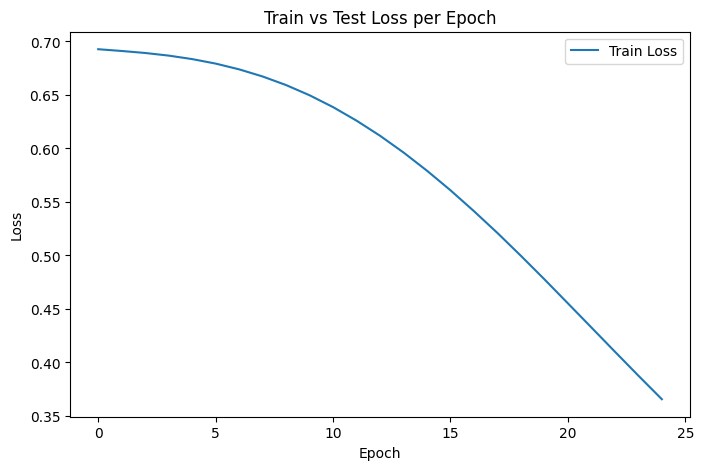

In [16]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss per Epoch')
plt.legend()
plt.show()

In [17]:
test_df.user.max()

np.int64(474)

In [18]:
items = test_df["item"].drop_duplicates()
users = test_df["user"].drop_duplicates()

users_tensor = torch.tensor(users, dtype=torch.long, device=device)
items_tensor = torch.tensor(items, dtype=torch.long, device=device)

In [ ]:
users_teste = torch.tensor(test_df["user"].drop_duplicates())
items_teste = torch.tensor(test_df["item"].drop_duplicates())


In [21]:
model.score(test_df) # agora ta gerando a rec mas ta dando um probleminha na hora de mapear os idss

IndexError: index 166 is out of bounds for dimension 0 with size 140

In [ ]:
data_bpr = bprMFLClickDebiasingDataloader(bpr_df_click)


train_len = int(0.7 * len(data_bpr))
test_len = len(data_bpr) - train_len


train_data, test_data = random_split(data_bpr, [train_len, test_len])



dataloader_bpr_train = DataLoader(train_data, batch_size=256, shuffle=True)
dataloader_bpr_test = DataLoader(test_data, batch_size=256, shuffle=True)

In [ ]:
n_users = bpr_df_click.user.max() + 1
n_items = bpr_df_click.pos_item.max() + 1

In [ ]:
model = bprMFWithClickDebiasing(
                num_users=n_users,
                num_items=n_items,
                factors=50,
                reg_lambda=1e-3,
                n_epochs=10).to(device)


optimizer = torch.optim.Adam(model.parameters(), lr=1e-4)


In [ ]:

train_losses = model.fit(dataloader_bpr_train, optimizer)

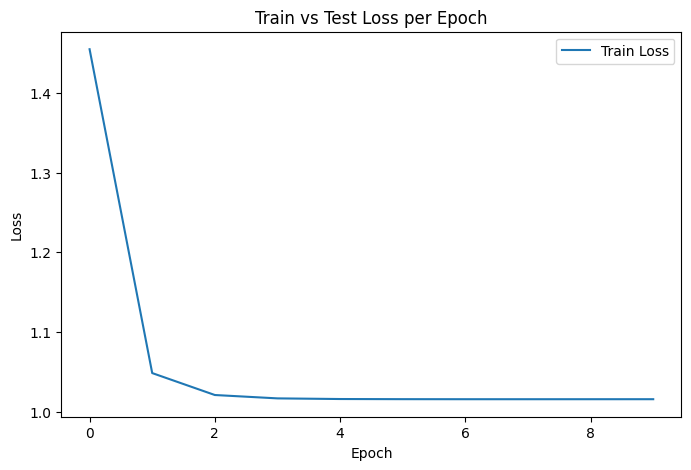

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train vs Test Loss per Epoch')
plt.legend()
plt.show()

In [ ]:
test_loss = model.evaluate(dataloader_bpr_test)

In [ ]:
test_loss

1.020030519841644

In [ ]:
evaluator = Evaluate(model, test_data, interactions, k=20)

In [ ]:
evaluator.MAP_at_k()

0.06997351358585503